# Requirements

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
import kagglehub
import os

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mutual_info_score
from sklearn.metrics import f1_score

# Parkinson's desiase dataset

In [2]:
path = kagglehub.dataset_download("rabieelkharoua/parkinsons-disease-dataset-analysis")
print(os.listdir(path))

['parkinsons_disease_data.csv']


In [3]:
file_path = os.path.join(path, "parkinsons_disease_data.csv")

In [6]:
data = pd.read_csv(file_path)
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [7]:
data.dtypes

PatientID                     int64
Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                         float64
Smoking                       int64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons       int64
TraumaticBrainInjury          int64
Hypertension                  int64
Diabetes                      int64
Depression                    int64
Stroke                        int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                        int64
Rigidity                    

In [14]:
df = data.drop(['PatientID', 'DoctorInCharge'], axis = 1)

In [15]:
df.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int

In [10]:
gender = {
    0: 'male',
    1: 'female'
}

df.Gender = df.Gender.map(gender)

In [11]:
ed = {
    0: 'lower',
    1: 'high_school',
    2: 'bachelor',
    3: 'higher'
}

df.EducationLevel = df.EducationLevel.map(ed)

In [12]:
ethnic = {
    0: 'caucasian',
    1: 'afr_amer',
    2: 'asian',
    3: 'other'
}

df.Ethnicity = df.Ethnicity.map(ethnic)

In [16]:
yes_no = {
    0: 'no',
    1: 'yes'
}

# Smoking
df.Smoking = df.Smoking.map(yes_no)

# Medical History
df.FamilyHistoryParkinsons = df.FamilyHistoryParkinsons.map(yes_no)
df.TraumaticBrainInjury = df.TraumaticBrainInjury.map(yes_no)
df.Hypertension = df.Hypertension.map(yes_no)
df.Diabetes = df.Diabetes.map(yes_no)
df.Depression = df.Depression.map(yes_no)
df.Stroke = df.Stroke.map(yes_no)

# Symptoms

df.Tremor = df.Tremor.map(yes_no)
df.Rigidity = df.Rigidity.map(yes_no)
df.Bradykinesia = df.Bradykinesia.map(yes_no)
df.PosturalInstability = df.PosturalInstability.map(yes_no)
df.SpeechProblems = df.SpeechProblems.map(yes_no)
df.SleepDisorders = df.SleepDisorders.map(yes_no)
df.Constipation = df.Constipation.map(yes_no)

In [14]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,male,other,high_school,19.619878,no,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,yes,no,no,no,no,no,no,0
1,75,male,caucasian,bachelor,16.247339,yes,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,no,yes,no,yes,no,yes,no,1
2,70,female,caucasian,lower,15.368239,no,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,yes,no,no,no,yes,no,yes,1
3,52,male,caucasian,lower,15.454557,no,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,yes,yes,yes,no,no,no,yes,1
4,87,male,caucasian,high_school,18.616042,no,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,no,no,no,yes,no,yes,no,0


In [15]:
df.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int

# Setting up the validation framework

In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.Diagnosis.values
y_val = df_val.Diagnosis.values
y_test = df_test.Diagnosis.values

del df_train['Diagnosis']
del df_val['Diagnosis']
del df_test['Diagnosis']

In [19]:
len(df_train), len(df_val), len(df_test)

(1263, 421, 421)

# EDA

In [20]:
from IPython.display import display

In [21]:
df_full_train = df_full_train.reset_index(drop=True)

In [21]:
categorical = []

for c in df_full_train.columns:
    if df_full_train[c].dtypes == "object":
        categorical.append(c)

categorical

['Smoking',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation']

## Feature importance: Risk ratio

In [26]:
tot_diagnosis = df_full_train.Diagnosis.mean()
tot_diagnosis

np.float64(0.6258907363420427)

In [24]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).Diagnosis.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - tot_diagnosis
    df_group['risk'] = df_group['mean'] / tot_diagnosis
    display(df_group)
    print()
    print()

Gender


,mean,count,diff,risk
Gender,,,,
female,0.636029,816,0.010139,1.016199
male,0.616359,868,-0.009531,0.984772




Ethnicity


,mean,count,diff,risk
Ethnicity,,,,
afr_amer,0.662651,332,0.036760,1.058732
asian,0.653595,153,0.027704,1.044263
caucasian,0.615010,1026,-0.010881,0.982615
other,0.595376,173,-0.030515,0.951245




EducationLevel


,mean,count,diff,risk
EducationLevel,,,,
bachelor,0.625243,515,-0.000648,0.998965
high_school,0.639053,676,0.013163,1.021030
higher,0.593220,177,-0.032670,0.947802
lower,0.617089,316,-0.008802,0.985937




Smoking


,mean,count,diff,risk
Smoking,,,,
no,0.624155,1184,-0.001735,0.997227
yes,0.630000,500,0.004109,1.006565




FamilyHistoryParkinsons


,mean,count,diff,risk
FamilyHistoryParkinsons,,,,
no,0.621884,1444,-0.004007,0.993598
yes,0.650000,240,0.024109,1.038520




TraumaticBrainInjury


,mean,count,diff,risk
TraumaticBrainInjury,,,,
no,0.622354,1512,-0.003536,0.994350
yes,0.656977,172,0.031086,1.049667




Hypertension


,mean,count,diff,risk
Hypertension,,,,
no,0.628312,1434,0.002422,1.003869
yes,0.612000,250,-0.013891,0.977806




Diabetes


,mean,count,diff,risk
Diabetes,,,,
no,0.614583,1440,-0.011307,0.981934
yes,0.692623,244,0.066732,1.106620




Depression


,mean,count,diff,risk
Depression,,,,
no,0.617450,1341,-0.008441,0.986514
yes,0.658892,343,0.033001,1.052727




Stroke


,mean,count,diff,risk
Stroke,,,,
no,0.623197,1595,-0.002693,0.995697
yes,0.674157,89,0.048267,1.077117




Tremor


,mean,count,diff,risk
Tremor,,,,
no,0.508475,944,-0.117416,0.812402
yes,0.775676,740,0.149785,1.239315




Rigidity


,mean,count,diff,risk
Rigidity,,,,
no,0.573025,1253,-0.052866,0.915535
yes,0.779582,431,0.153692,1.245557




Bradykinesia


,mean,count,diff,risk
Bradykinesia,,,,
no,0.581887,1325,-0.044004,0.929694
yes,0.788301,359,0.162410,1.259486




PosturalInstability


,mean,count,diff,risk
PosturalInstability,,,,
no,0.596154,1456,-0.029737,0.952489
yes,0.815789,228,0.189899,1.303406




SpeechProblems


,mean,count,diff,risk
SpeechProblems,,,,
no,0.629032,1178,0.003142,1.005019
yes,0.618577,506,-0.007314,0.988315




SleepDisorders


,mean,count,diff,risk
SleepDisorders,,,,
no,0.626582,1264,0.000692,1.001105
yes,0.623810,420,-0.002081,0.996675




Constipation


,mean,count,diff,risk
Constipation,,,,
no,0.617003,1188,-0.008887,0.98580
yes,0.647177,496,0.021287,1.03401


## Feature importance: Mutual information

In [19]:
def mutual_info_diagnosis_score(series):
    return mutual_info_score(series, df_full_train.Diagnosis)

In [27]:
mi = df_full_train[categorical].apply(mutual_info_diagnosis_score)
mi.sort_values(ascending=False)

Tremor                     0.038709
Rigidity                   0.018335
Bradykinesia               0.016281
PosturalInstability        0.013214
Diabetes                   0.001649
Depression                 0.000601
Constipation               0.000406
Stroke                     0.000283
TraumaticBrainInjury       0.000237
FamilyHistoryParkinsons    0.000208
Hypertension               0.000072
SpeechProblems             0.000049
Smoking                    0.000015
SleepDisorders             0.000003
dtype: float64

In [28]:
cat_predictors = mi.sort_values(ascending=False)[:4].keys().to_list()
cat_predictors

['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']

## Feature importance: Correlation

In [29]:
numerical = []

for c in df_full_train.columns:
    if df_full_train[c].dtypes != "object":
        numerical.append(c)

numerical

['Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'UPDRS',
 'MoCA',
 'FunctionalAssessment',
 'Diagnosis']

In [30]:
fi = df_full_train[numerical].corrwith(df_full_train.Diagnosis).abs()
fi.sort_values(ascending=False)

Diagnosis                   1.000000
UPDRS                       0.396303
FunctionalAssessment        0.230157
MoCA                        0.171216
Age                         0.065182
SleepQuality                0.063137
BMI                         0.042738
AlcoholConsumption          0.042527
DietQuality                 0.035902
DiastolicBP                 0.030394
CholesterolHDL              0.027996
CholesterolLDL              0.027514
PhysicalActivity            0.024314
CholesterolTotal            0.020317
Gender                      0.020315
EducationLevel              0.012463
CholesterolTriglycerides    0.009714
Ethnicity                   0.005906
SystolicBP                  0.000162
dtype: float64

In [31]:
num_predictors = fi.sort_values(ascending=False)[1:9].keys().to_list()

num_predictors

['UPDRS',
 'FunctionalAssessment',
 'MoCA',
 'Age',
 'SleepQuality',
 'BMI',
 'AlcoholConsumption',
 'DietQuality']

# Model selection

## One-hot encoding

In [31]:
dv = DictVectorizer(sparse=False)

### Full model

In [32]:
train_dict_f = df_train.to_dict(orient='records')
X_train_f = dv.fit_transform(train_dict_f)

val_dict_f = df_val.to_dict(orient='records')
X_val_f = dv.transform(val_dict_f)

### Limited model

In [33]:
train_dict = df_train[cat_predictors + num_predictors].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_predictors + num_predictors].to_dict(orient='records')
X_val = dv.transform(val_dict)

## Logistic regressions

### Limited

In [34]:
model_log_lim = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)

In [35]:
model_log_lim.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
y_pred_lim = model_log_lim.predict_proba(X_val)[:, 1]

In [37]:
auc_lim = roc_auc_score(y_val, y_pred_lim)
auc_lim

0.8972511532791173

### Full

In [38]:
model_log_full = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model_log_full.fit(X_train_f, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
y_pred_full = model_log_full.predict_proba(X_val_f)[:, 1]

In [40]:
auc_full = roc_auc_score(y_val, y_pred_full)
auc_full

0.8968231321634089

## Precision and Recall

### Full

In [41]:
scores_full = []

for t in np.linspace(0, 1, 50):
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred_full >= t)
    predict_negative = (y_pred_full < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    if tp + fp == 0:
        p = 0  
    else:
        p = tp / (tp + fp)
    
    if tp + fn == 0:
        r = 0
    else:
        r = tp / (tp + fn)

    scores_full.append((t, p, r))

In [42]:
scores_full[:5]

[(np.float64(0.0), np.float64(0.6128266033254157), np.float64(1.0)),
 (np.float64(0.02040816326530612),
  np.float64(0.628361858190709),
  np.float64(0.9961240310077519)),
 (np.float64(0.04081632653061224),
  np.float64(0.6408977556109726),
  np.float64(0.9961240310077519)),
 (np.float64(0.061224489795918366),
  np.float64(0.6580310880829016),
  np.float64(0.9844961240310077)),
 (np.float64(0.08163265306122448),
  np.float64(0.6809651474530831),
  np.float64(0.9844961240310077))]

In [43]:
columns = ['threshold', 'Precision', 'Recall']
df_scores_full = pd.DataFrame(scores_full, columns=columns)

df_scores_full[:5]

,threshold,Precision,Recall
0,0.000000,0.612827,1.000000
1,0.020408,0.628362,0.996124
2,0.040816,0.640898,0.996124
3,0.061224,0.658031,0.984496
4,0.081633,0.680965,0.984496


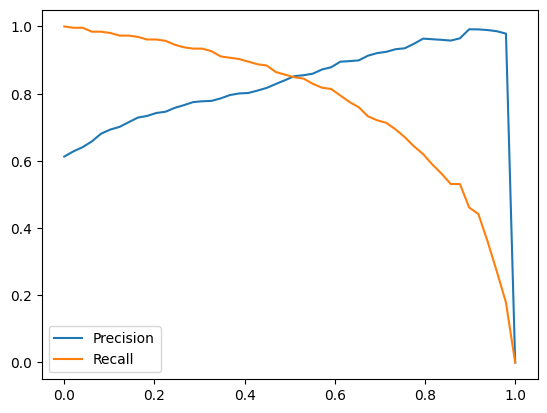

In [44]:
plt.plot(df_scores_full.threshold, df_scores_full['Precision'], label='Precision')
plt.plot(df_scores_full.threshold, df_scores_full['Recall'], label='Recall')
plt.legend()

In [45]:
f1_full = []
for s in scores_full:
    if (s[1] + s[2]) == 0:
        f = 0
    else:
        f = 2 * s[1] * s[2] / (s[1] + s[2])
    f1_full.append({"threshlod": s[0], "score": f})

best_full = max(f1_full, key=lambda x: x["score"])
best_full

{'threshlod': np.float64(0.5102040816326531),
 'score': np.float64(0.850485436893204)}

### Limited

In [46]:
scores_l = []

for t in np.linspace(0, 1, 50):
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred_lim >= t)
    predict_negative = (y_pred_lim < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    if tp + fp == 0:
        p = 0  
    else:
        p = tp / (tp + fp)
    
    if tp + fn == 0:
        r = 0
    else:
        r = tp / (tp + fn)

    scores_l.append((t, p, r))

In [47]:
scores_l[:5]

[(np.float64(0.0), np.float64(0.6128266033254157), np.float64(1.0)),
 (np.float64(0.02040816326530612),
  np.float64(0.6253041362530414),
  np.float64(0.9961240310077519)),
 (np.float64(0.04081632653061224),
  np.float64(0.6393034825870647),
  np.float64(0.9961240310077519)),
 (np.float64(0.061224489795918366),
  np.float64(0.6649350649350649),
  np.float64(0.9922480620155039)),
 (np.float64(0.08163265306122448),
  np.float64(0.6710526315789473),
  np.float64(0.9883720930232558))]

In [48]:
columns = ['threshold', 'Precision', 'Recall']
df_scores_l = pd.DataFrame(scores_l, columns=columns)

df_scores_l [:5]

,threshold,Precision,Recall
0,0.000000,0.612827,1.000000
1,0.020408,0.625304,0.996124
2,0.040816,0.639303,0.996124
3,0.061224,0.664935,0.992248
4,0.081633,0.671053,0.988372


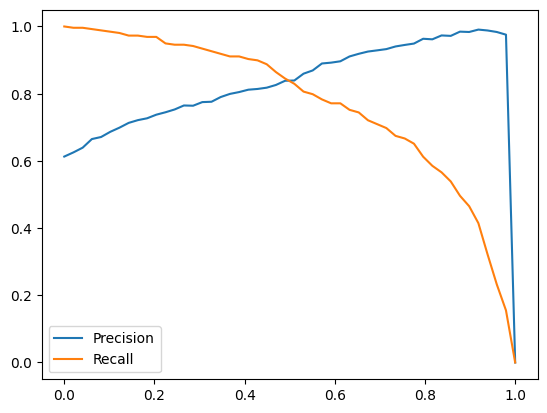

In [49]:
plt.plot(df_scores_l.threshold, df_scores_l['Precision'], label='Precision')
plt.plot(df_scores_l.threshold, df_scores_l['Recall'], label='Recall')
plt.legend()

In [50]:
f1_l = []
for s in scores_l:
    if (s[1] + s[2]) == 0:
        f = 0
    else:
        f = 2 * s[1] * s[2] / (s[1] + s[2])
    f1_l.append({"threshlod": s[0], "score": f})

best_l = max(f1_l, key=lambda x: x["score"])
best_l

{'threshlod': np.float64(0.4081632653061224),
 'score': np.float64(0.855045871559633)}

### The model with limited number of predictors won the competition!
It showed better auc (0.8972 vs 0.8968) and F1 (0.855 vs 0.850). The best threshlod for the restricted model is 0.408.

Therefore, I proceed with the selected predictors: cat_predictors + num_predictors. I will try to put them in other types of models.

### K-Fold Cross-Validation for the winning model and testing different hyperparameters

In [51]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [52]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat_predictors + num_predictors].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

In [53]:
def predict(df, dv, model):
    dicts = df[cat_predictors + num_predictors].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [54]:
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.Diagnosis.values
        y_val = df_val.Diagnosis.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.80811 +- 0.02750
C=0.01 0.87260 +- 0.01788
C=0.1 0.89708 +- 0.01127
C=0.5 0.89881 +- 0.01097
C=1 0.89914 +- 0.01098
C=1.5 0.89913 +- 0.01108
C=2 0.89900 +- 0.01112


The best C = 1 (AUC score = 0.899); Standard deviation across 10 splits = 0.01

## Decision tree
Tuning max depth and min samples leaf

In [37]:
train_dict = df_train[cat_predictors + num_predictors].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_predictors + num_predictors].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [56]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.744
   2 -> 0.822
   3 -> 0.885
   4 -> 0.920
   5 -> 0.913
   6 -> 0.933
   7 -> 0.907
   8 -> 0.864
   9 -> 0.882
  10 -> 0.874
  15 -> 0.867
  20 -> 0.876
None -> 0.867


The best max depths: 4, 5, 6, 7. The best for now is 5, but I wil test several options for various min samle leaves.

In [57]:
scores = []

for depth in [4, 5, 6, 7]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [58]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [59]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             4      5      6      7
min_samples_leaf                            
1                 0.920  0.913  0.940  0.915
5                 0.920  0.938  0.950  0.919
10                0.936  0.954  0.944  0.920
15                0.935  0.957  0.953  0.934
20                0.935  0.959  0.957  0.955
50                0.922  0.924  0.924  0.924
100               0.898  0.895  0.895  0.895
200               0.865  0.865  0.865  0.865

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

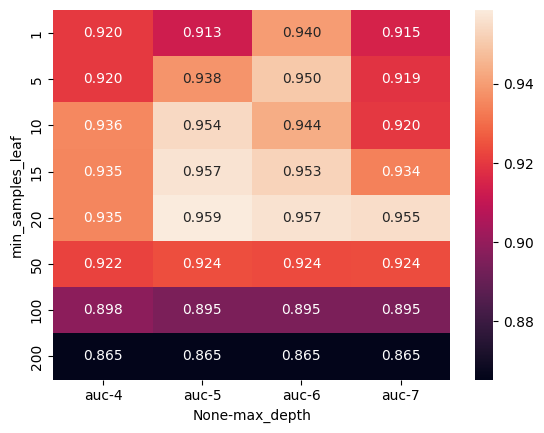

In [60]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The best combination: max depth = 5, min sample leaf = 20; the AUC score = 0.959

In [61]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [62]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- UPDRS <= 50.00
|   |--- PosturalInstability=no <= 0.50
|   |   |--- FunctionalAssessment <= 4.99
|   |   |   |--- class: 1
|   |   |--- FunctionalAssessment >  4.99
|   |   |   |--- class: 0
|   |--- PosturalInstability=no >  0.50
|   |   |--- Tremor=yes <= 0.50
|   |   |   |--- DietQuality <= 0.59
|   |   |   |   |--- class: 0
|   |   |   |--- DietQuality >  0.59
|   |   |   |   |--- FunctionalAssessment <= 5.76
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- FunctionalAssessment >  5.76
|   |   |   |   |   |--- class: 0
|   |   |--- Tremor=yes >  0.50
|   |   |   |--- Bradykinesia=yes <= 0.50
|   |   |   |   |--- Rigidity=no <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Rigidity=no >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Bradykinesia=yes >  0.50
|   |   |   |   |--- class: 1
|--- UPDRS >  50.00
|   |--- Tremor=no <= 0.50
|   |   |--- MoCA <= 26.00
|   |   |   |--- Age <= 60.50
|   |   |   |   |--- FunctionalAssessment <= 6.57
|   |   | 

In [63]:
def train_dt(df_train, y_train):
    dicts = df_train[cat_predictors + num_predictors].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
    model.fit(X_train, y_train)
    
    return dv, model

In [64]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.Diagnosis.values
    y_val = df_val.Diagnosis.values

    dv, model = train_dt(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.5f +- %.5f' % (np.mean(scores), np.std(scores)))

0.92028 +- 0.02257


Less stable result than that of a logistic regression

## Random forest

In [65]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [66]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

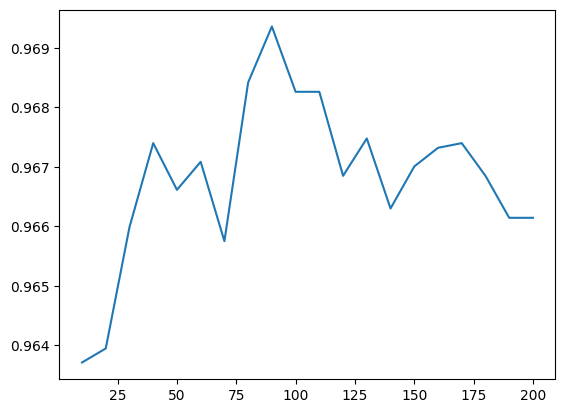

In [67]:
plt.plot(df_scores.n_estimators, df_scores.auc)

The best output somewhere inbetween 80 and 100

In [68]:
scores = []

for n in range(80, 100, 5):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [69]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

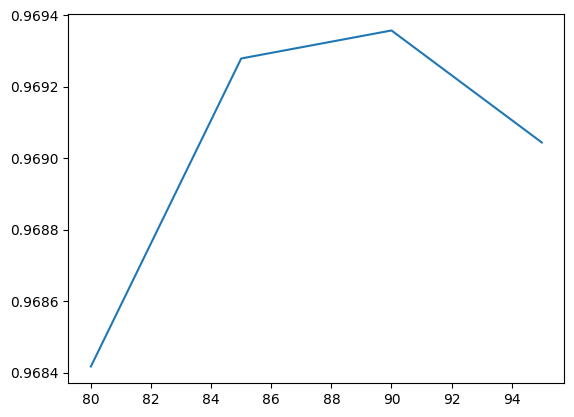

In [70]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [71]:
scores = []

for d in [5, 10, 15, 20]:
    for n in range(10, 100, 5):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [72]:
columns = ['max_depth','n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

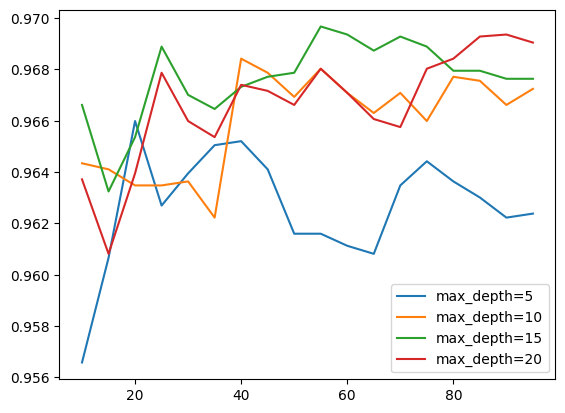

In [73]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

The best max depth is 15, the best number of estimators is somewhere between 45 and 65

In [74]:
scores = []
for n in range(45, 65):
    rf = RandomForestClassifier(n_estimators=n,
                                max_depth=15,
                                random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [75]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.sort_values(by='auc', ascending=False)[:5]

,n_estimators,auc
12,57,0.969984
13,58,0.969749
10,55,0.969671
9,54,0.969671
14,59,0.969592


The best n_est = 57 (max depth = 15); auc score = 0.969984

This is the best result for now

### Confusion matrix

In [38]:
rf = RandomForestClassifier(n_estimators=57,
                                max_depth=15,
                                random_state=1)
rf.fit(X_train, y_train)

,n_estimators,57
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [198]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [199]:
y_pred_rf = []

for y in y_pred:
    y_pred_rf.append(int(y >= 0.5))

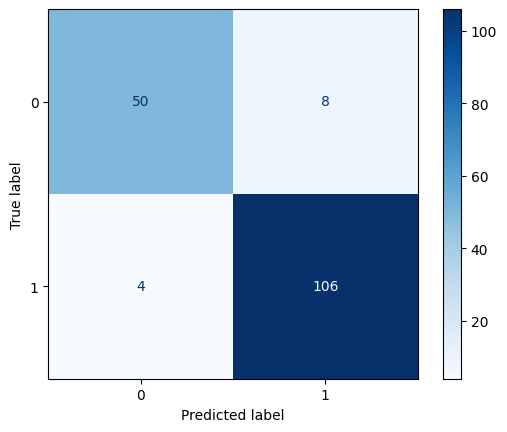

In [201]:
cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

## Gradient boosting

In [76]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [77]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [78]:
y_pred = model_gb.predict(dval)

In [79]:
roc_auc_score(y_val, y_pred)

0.9607366771159875

Worse than the result of a tuned random tree. Let's tune the boosting procedure

In [80]:
xgb_params = {
    'eta': 0.5, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [81]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.958307210031348

Even worse

In [82]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [83]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.943730407523511

even worse

In [84]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 15,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [85]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.9634012539184953

The best eta = 0.1; now we will compare different min chils weights

In [86]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 15,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [87]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.9615203761755486

In [88]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 15,
    'min_child_weight': 7,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [89]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.9632445141065831

In [190]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [191]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.9634012539184953

In [92]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_gb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [185]:
y_pred = model_gb.predict(dval)
roc_auc_score(y_val, y_pred)

0.9601097178683385

The best min child weight for now is 5

Best combination: eta = 0.1, max depth 10, min cheild weight = 5. AUC score = 0.9634. But this is still lower than the AUC score diven by a random forest (AUC score = 0.9699). Therefore, the random forest model is considered the best one.

### Confusion matrix

In [188]:
y_pred_gb = []

for y in y_pred:
    y_pred_gb.append(int(y >= 0.5))

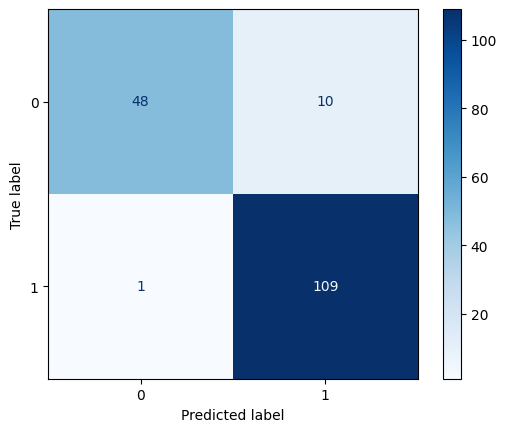

In [189]:
cm = confusion_matrix(y_val, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

**The chosen model**: RandomForestClassifier (n_est = 57; max depth = 15)

AUC score = 0.969984

## Best threshold for selected model

In [138]:
train_dict = df_train[cat_predictors + num_predictors].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_predictors + num_predictors].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [139]:
y_train = df_train.Diagnosis.values
y_val = df_val.Diagnosis.values

del df_train['Diagnosis']
del df_val['Diagnosis']

In [140]:
rf = RandomForestClassifier(n_estimators=57,
                                max_depth=15,
                                random_state=1)
rf.fit(X_train, y_train)

,n_estimators,57
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [143]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]

In [152]:
scores_f1 = []

for t in np.linspace(0, 1, 50):
    scores_f1.append({"threshold": t, "score": (f1_score(y_val, (y_pred_rf >= t).astype(int)))})

In [153]:
scores_f1[:3]

[{'threshold': np.float64(0.0), 'score': 0.7913669064748201},
 {'threshold': np.float64(0.02040816326530612), 'score': 0.8088235294117647},
 {'threshold': np.float64(0.04081632653061224), 'score': 0.8270676691729323}]

In [154]:
best_f1 = max(scores_f1, key=lambda x: x["score"])
best_f1

{'threshold': np.float64(0.44897959183673464), 'score': 0.9557522123893806}

Best threshold = **0.45**

# Train selected model

In [33]:
dv = DictVectorizer(sparse=False)

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

y_full_train = df_full_train.Diagnosis.values
y_test = df_test.Diagnosis.values

del df_full_train['Diagnosis']
del df_test['Diagnosis']

In [34]:
full_train_dict = df_full_train[cat_predictors + num_predictors].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test[cat_predictors + num_predictors].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [39]:
rf = RandomForestClassifier(n_estimators=57,
                                max_depth=15,
                                random_state=1)
rf.fit(X_full_train, y_full_train)

,n_estimators,57
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.9607602339181287

### Applying the threshlod

In [41]:
y_pred_des = []

for y in y_pred:
    y_pred_des.append(int(y >= 0.45))

In [42]:
f1 = f1_score(y_test, y_pred_des)
f1

0.9297912713472486

### Accuracy and confusion matrix

In [44]:
acc = (y_pred_des == y_test).mean()
print("Accuracy: ", round(acc, 3))

Accuracy:  0.912


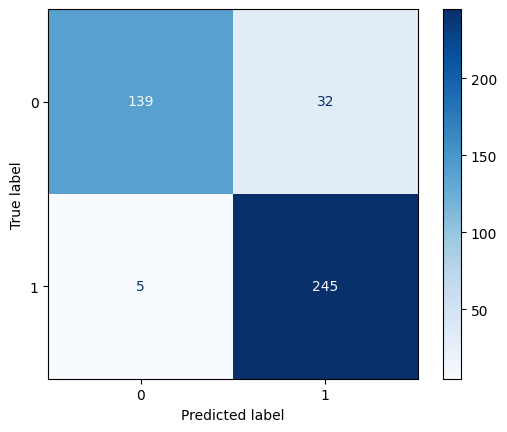

In [182]:
cm = confusion_matrix(y_test, y_pred_des)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')